## Normal distributions and and logistic curves

A student was asking about why we use the logistic function (rather than some other sigmoid) in modeling, and we wondered whether a couple normal distributions in one dimension would have the appropriate pdf ratio.


So this notebook is exploring whether a generative model with normal distributions matches a discriminative logistic model.

First, the math.

Assume $\sigma = 1$ and we have two standard distributions centered at $\mu$ and $-\mu$. The ratio between the pdfs is
$$\begin{align}
\text{ratio} &= \frac{\frac{1}{\sqrt{2\pi}}e^{-\frac{(x-\mu)^2}{2}}}
                     {\frac{1}{\sqrt{2\pi}}e^{-\frac{(x-\mu)^2}{2}} + 
                      \frac{1}{\sqrt{2\pi}}e^{-\frac{(x+\mu)^2}{2}}} \\
             &= \frac{e^{-\frac{(x-\mu)^2}{2}}}
                     {e^{-\frac{(x-\mu)^2}{2}} + 
                      e^{-\frac{(x+\mu)^2}{2}}} \\
\\                      
\\                      
 \\                     
 &= \frac{e^{-\frac{(x-\mu)^2}{2}}}{e^{-\frac{(x+\mu)^2}{2}}} \\
 &= \sqrt{\frac{e^{(x+\mu)^2}}  {e^{(x-\mu)^2}}} \\
 &= \sqrt{\frac{e^{x^2 + 2x\mu + \mu^2}}  {e^{x^2 - 2x\mu + \mu^2}}} \\
 &= \sqrt{\frac{e^{2x\mu}}  {e^{-2x\mu}}} \\
 &= \frac{e^{x\mu}}  {e^{-x\mu}} \\
\\
\end{align}
$$

In [1]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
from scipy import stats

In [2]:
def logistic(x):
    return 1/(1+np.exp(-x))

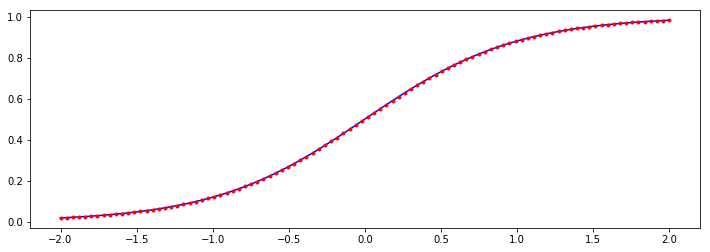

In [10]:
sep = 2
xpts = np.linspace(-sep, sep, 100)
dist1 = stats.norm(-sep/2,1)
dist2 = stats.norm(sep/2,1)
ratio = dist2.pdf(xpts) / (dist1.pdf(xpts) + dist2.pdf(xpts))

fig, ax = plt.subplots(figsize=(12,4))
ax.plot(xpts, ratio, 'b-')

logit = logistic(xpts * sep)
ax.plot(xpts, logit, 'r.')

#ax.set_xlim(-2, 2)

Those are exactly on top of each other, which sort of confirms the idea.

Note that it might not be true in the general case (in particular, it won't if they have different variances).